In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew

In [73]:
df = pd.read_csv("/content/drive/MyDrive/OSX_DS_assignment.csv")
df1 = pd.read_csv("/content/drive/MyDrive/OSX_DS_assignment.csv")

In [74]:
df.shape

(103322, 12)

In [75]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [76]:
df.isnull().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [77]:
df.variety.unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Gewürztraminer', 'Cabernet Sauvignon', 'Chardonnay',
       'Malbec', 'Red Blend', 'Merlot', 'Gamay', 'Sauvignon Blanc',
       'Bordeaux-style White Blend', 'Sangiovese', 'Cabernet Franc',
       'Champagne Blend', 'Bordeaux-style Red Blend', 'Rosé', 'Zinfandel',
       'Grüner Veltliner', 'Syrah', 'Nebbiolo', 'Rhône-style Red Blend',
       'Portuguese White', 'Sparkling Blend', 'Pinot Grigio',
       'Tempranillo'], dtype=object)

In [78]:
df['variety'].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [79]:
df.corr()

<ipython-input-79-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,points,price
points,1.000000,0.415651
price,0.415651,1.000000


In [80]:
df1['user_name'] = df1['user_name'].astype('category').cat.codes
df1['country'] = df1['country'].astype('category').cat.codes
df1['designation'] = df1['designation'].astype('category').cat.codes
df1['review_title'] = df1['review_title'].astype('category').cat.codes
df1['review_description'] = df1['review_description'].astype('category').cat.codes
df1['province'] = df1['province'].astype('category').cat.codes
df1['region_1'] = df1['region_1'].astype('category').cat.codes
df1['region_2'] = df1['region_2'].astype('category').cat.codes
df1['winery'] = df1['winery'].astype('category').cat.codes
df1['variety'] = df1['variety'].astype('category').cat.codes

df1.corr()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
user_name,1.000000,-0.253140,-0.090128,0.002209,-0.007295,-0.005859,-0.011737,0.017937,-0.040750,-0.130357,-0.090499,-0.110658
country,-0.253140,1.000000,0.101291,0.014802,0.001449,0.012305,0.008848,-0.086048,0.329237,0.590923,0.096849,0.114210
review_title,-0.090128,0.101291,1.000000,0.002980,0.054536,-0.013340,-0.011179,0.043238,0.011010,0.080756,0.997667,0.081379
review_description,0.002209,0.014802,0.002980,1.000000,0.003910,-0.009002,0.010509,0.005781,-0.008363,0.019737,0.003792,-0.011429
designation,-0.007295,0.001449,0.054536,0.003910,1.000000,0.096130,0.042832,0.063319,-0.025943,0.008329,0.054869,0.115512
points,-0.005859,0.012305,-0.013340,-0.009002,0.096130,1.000000,0.415651,-0.007957,0.044998,0.069558,-0.011277,-0.064303
price,-0.011737,0.008848,-0.011179,0.010509,0.042832,0.415651,1.000000,-0.050781,0.060567,0.047773,-0.010167,-0.110823
province,0.017937,-0.086048,0.043238,0.005781,0.063319,-0.007957,-0.050781,1.000000,-0.010820,-0.100029,0.039993,0.184569
region_1,-0.040750,0.329237,0.011010,-0.008363,-0.025943,0.044998,0.060567,-0.010820,1.000000,0.378740,0.008920,-0.017242
region_2,-0.130357,0.590923,0.080756,0.019737,0.008329,0.069558,0.047773,-0.100029,0.378740,1.000000,0.078870,-0.002076


In [81]:
df1.isnull().sum()

user_name                0
country                  0
review_title             0
review_description       0
designation              0
points                   0
price                 6963
province                 0
region_1                 0
region_2                 0
winery                   0
variety                  0
dtype: int64

In [82]:
# df1 = df1.dropna()
df1.shape

(103322, 12)

In [83]:
# drop_columns = ['user_name', 'region_1', 'region_2']

df = df.drop('user_name', axis = 1)

In [84]:
df['region_2'] = df.region_2.fillna("Unknown")
df['region_1'] = df.region_1.fillna("Unknown")

In [85]:
df.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Unknown,Nicosia,White Blend
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Unknown,Quinta dos Avidagos,Portuguese Red
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Unknown,St. Julian,Riesling
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [86]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [87]:
def CalcOutliers(df_num): 
  
    data_mean, data_std = np.mean(df_num), np.std(df_num)
    cut = data_std * 3


    lower, upper = data_mean - cut, data_mean + cut


    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]


    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentage of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentage of outliers in points

In [88]:
resumetable(df)

Dataset Shape: (103322, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,country,object,39,40,Italy,Portugal,US,2.60
1,review_title,object,0,94482,Nicosia 2013 Vulkà Bianco (Etna),Quinta dos Avidagos 2011 Avidagos Red (Douro),Rainstorm 2013 Pinot Gris (Willamette Valley),16.48
2,review_description,object,0,95434,"Aromas include tropical fruit, broom, brimston...","This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and...",16.50
3,designation,object,29636,30309,Vulkà Bianco,Avidagos,NaN,13.54
4,points,int64,0,21,87,87,87,3.66
5,price,float64,6963,366,NaN,15.0,14.0,5.82
6,province,object,39,370,Sicily & Sardinia,Douro,Oregon,4.74
7,region_1,object,0,1057,Etna,Unknown,Willamette Valley,7.01
8,region_2,object,0,18,Unknown,Unknown,Willamette Valley,2.40
9,winery,object,0,14728,Nicosia,Quinta dos Avidagos,Rainstorm,12.79


In [89]:
df.describe()

,points,price
count,103322.000000,96359.000000
mean,88.540630,36.781224
std,3.090903,42.867069
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


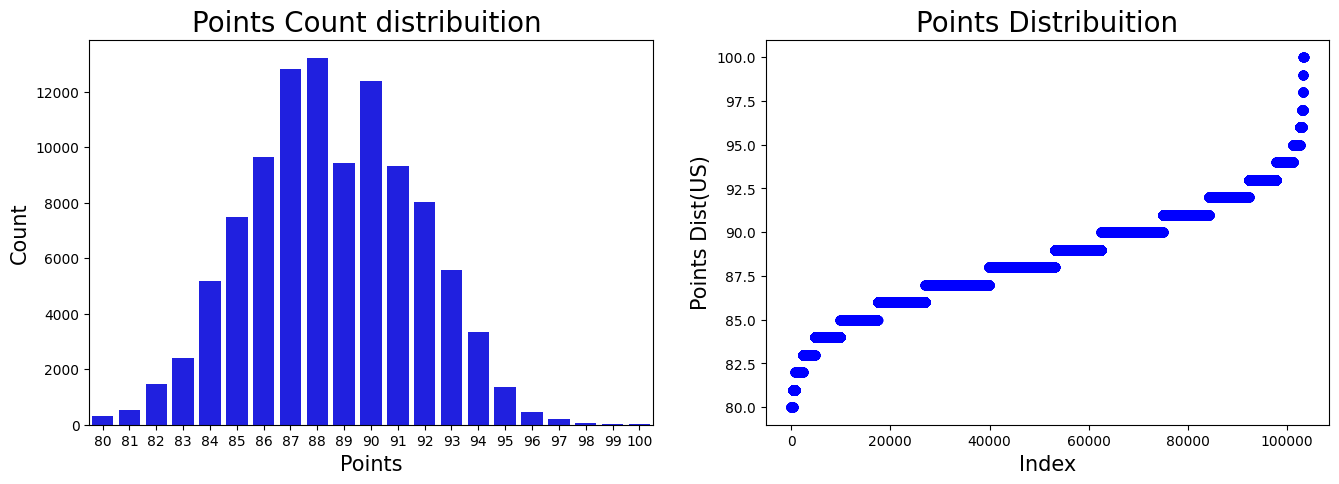

In [90]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=df, color='blue') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df.shape[0]), np.sort(df.points.values), color='blue') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show()

In [91]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df["rating_cat"] = df["points"].apply(cat_points)

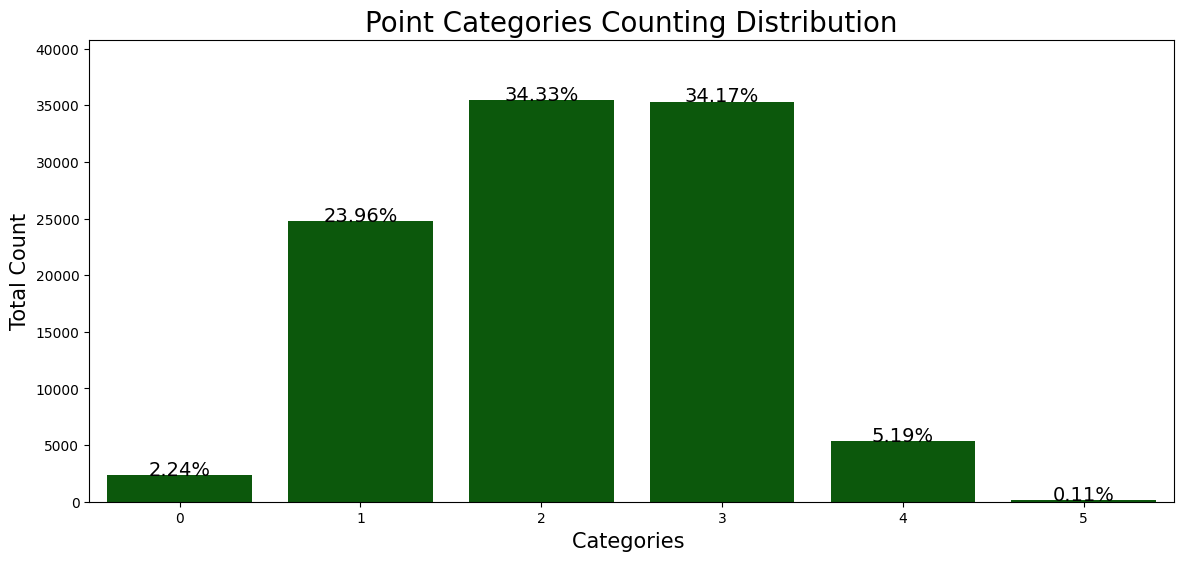

In [92]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.15)

plt.show()

In [93]:
CalcOutliers(df['points'])

Identified lowest outliers: 0
Identified upper outliers: 109
Identified outliers: 109
Non-outlier observations: 103213
Total percentage of Outliers:  0.1056


<ipython-input-94-a38737e70f2d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(np.log(df['price'].dropna() + 1),


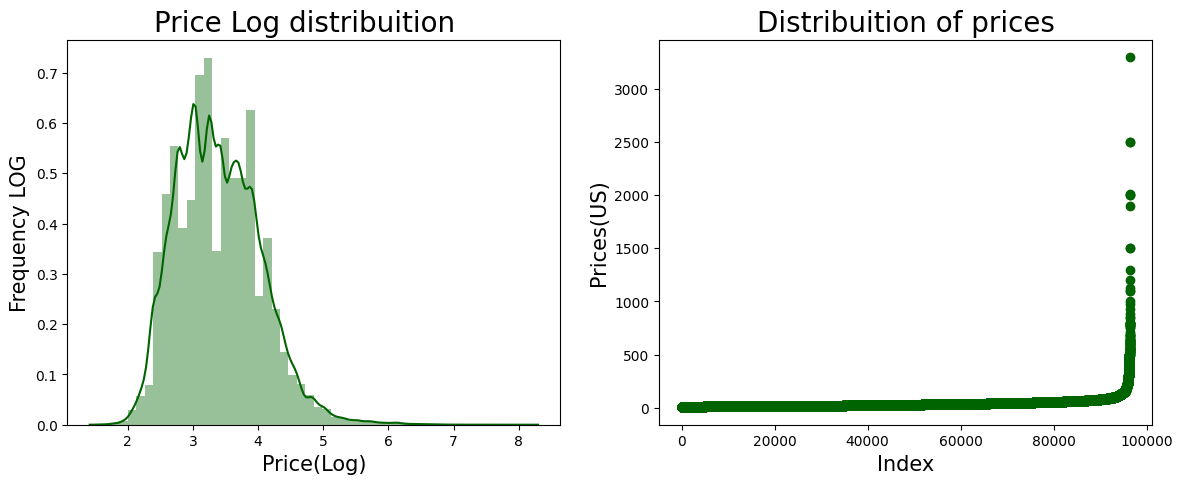

In [94]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df.shape[0]), np.sort(df.price.values), 
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

In [95]:
CalcOutliers(df['price'])

Identified lowest outliers: 0
Identified upper outliers: 926
Identified outliers: 926
Non-outlier observations: 95433
Total percentage of Outliers:  0.9703


<ipython-input-96-5ffb8cf98bc3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df[df['price'] < 300]['price'], color='darkgreen')


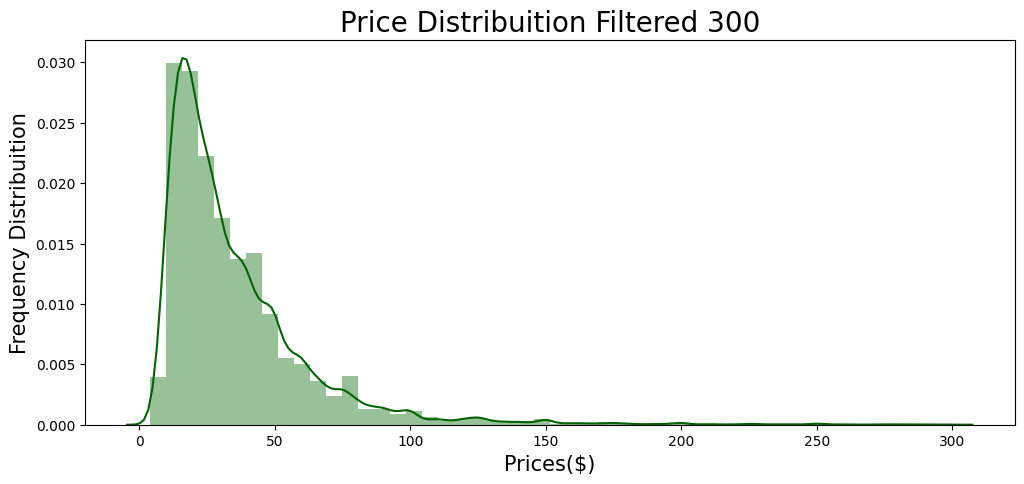

In [96]:
plt.figure(figsize=(12,5))

g = sns.distplot(df[df['price'] < 300]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices($)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

In [97]:
df['log_price'] = np.log(df['price'])

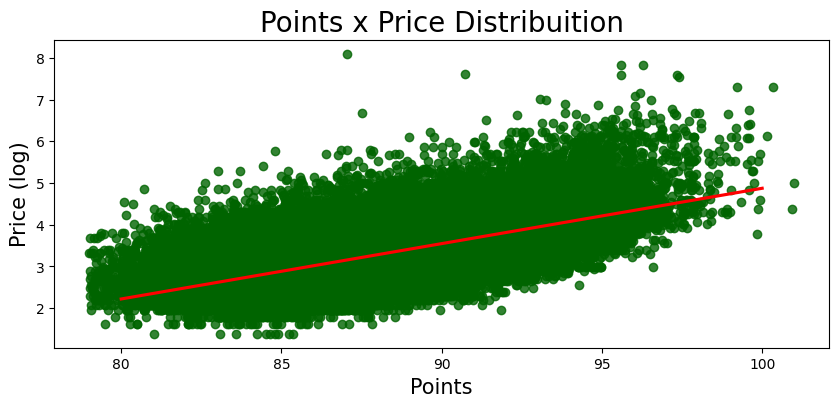

In [98]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='log_price', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

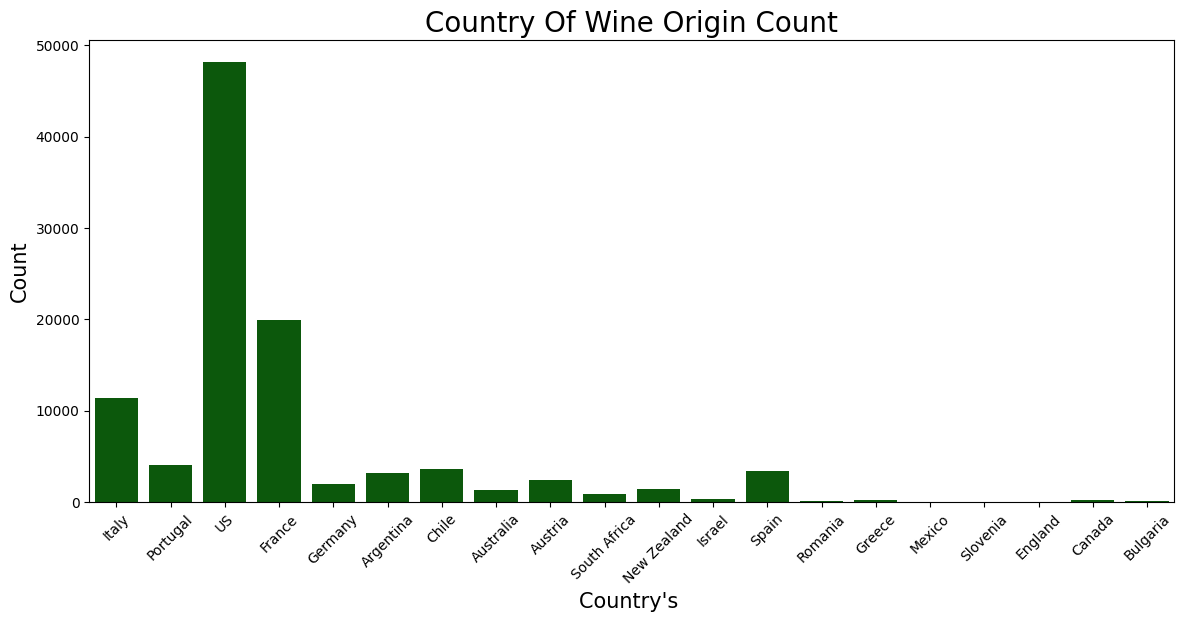

In [99]:
plt.figure(figsize=(14,6))

country = df.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df[df.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

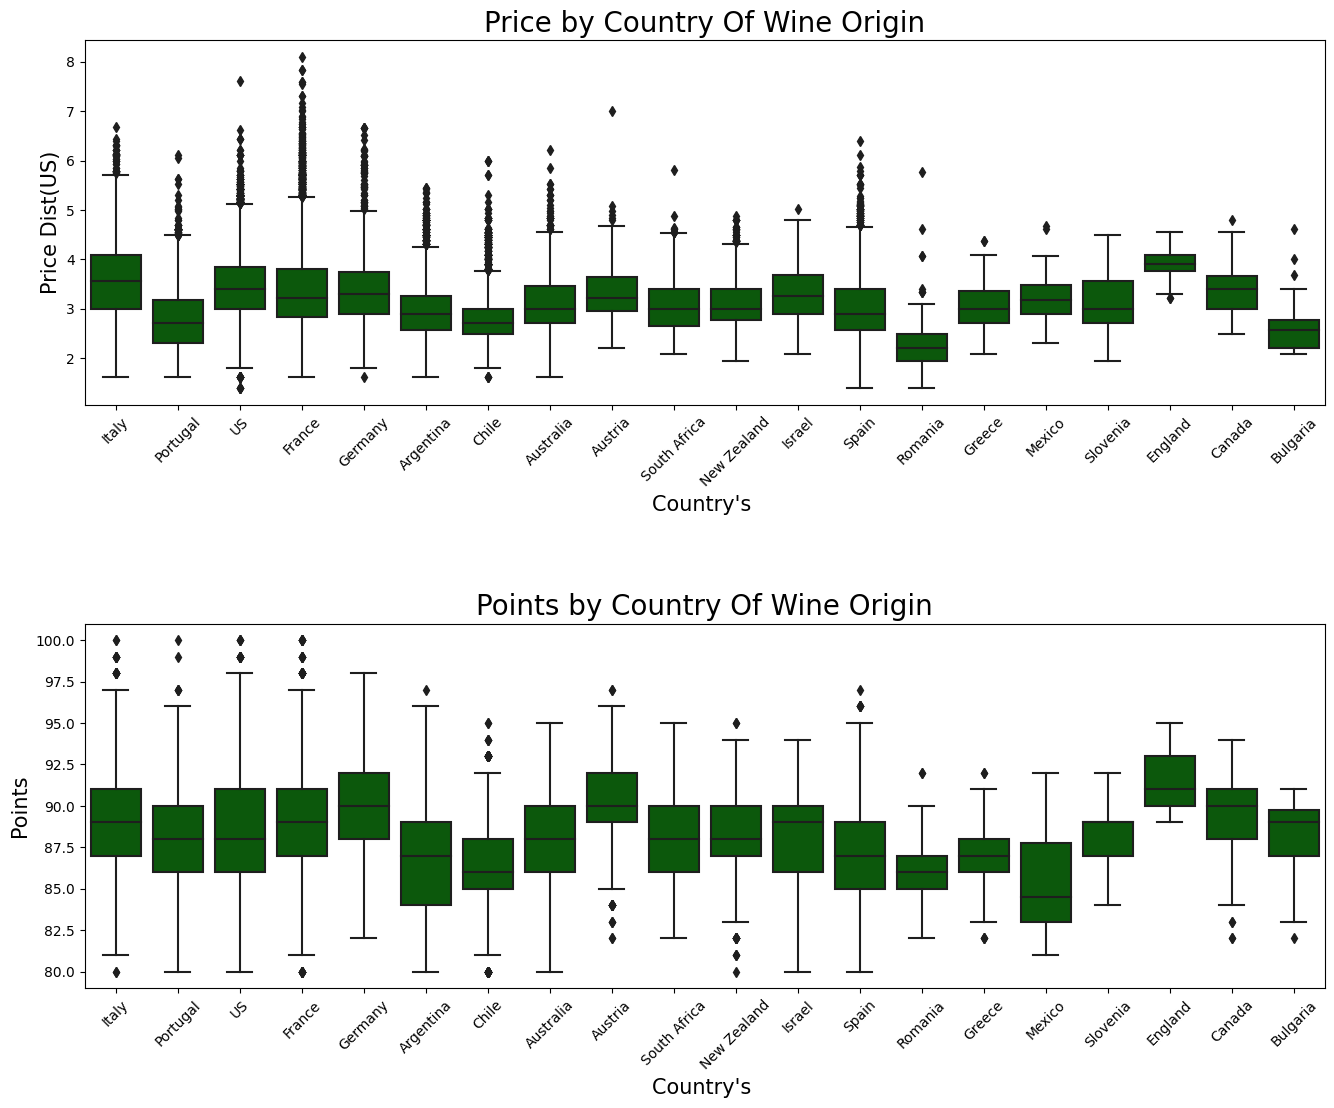

In [100]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='log_price',
                  data=df.loc[(df.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

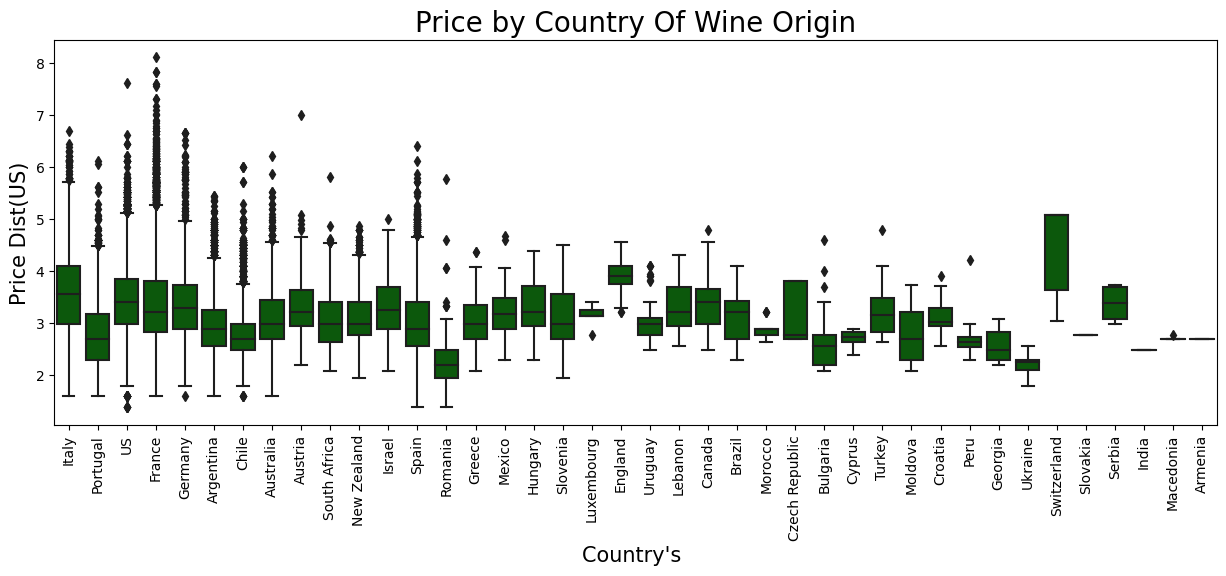

In [101]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='log_price', color='darkgreen',
                  data=df)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

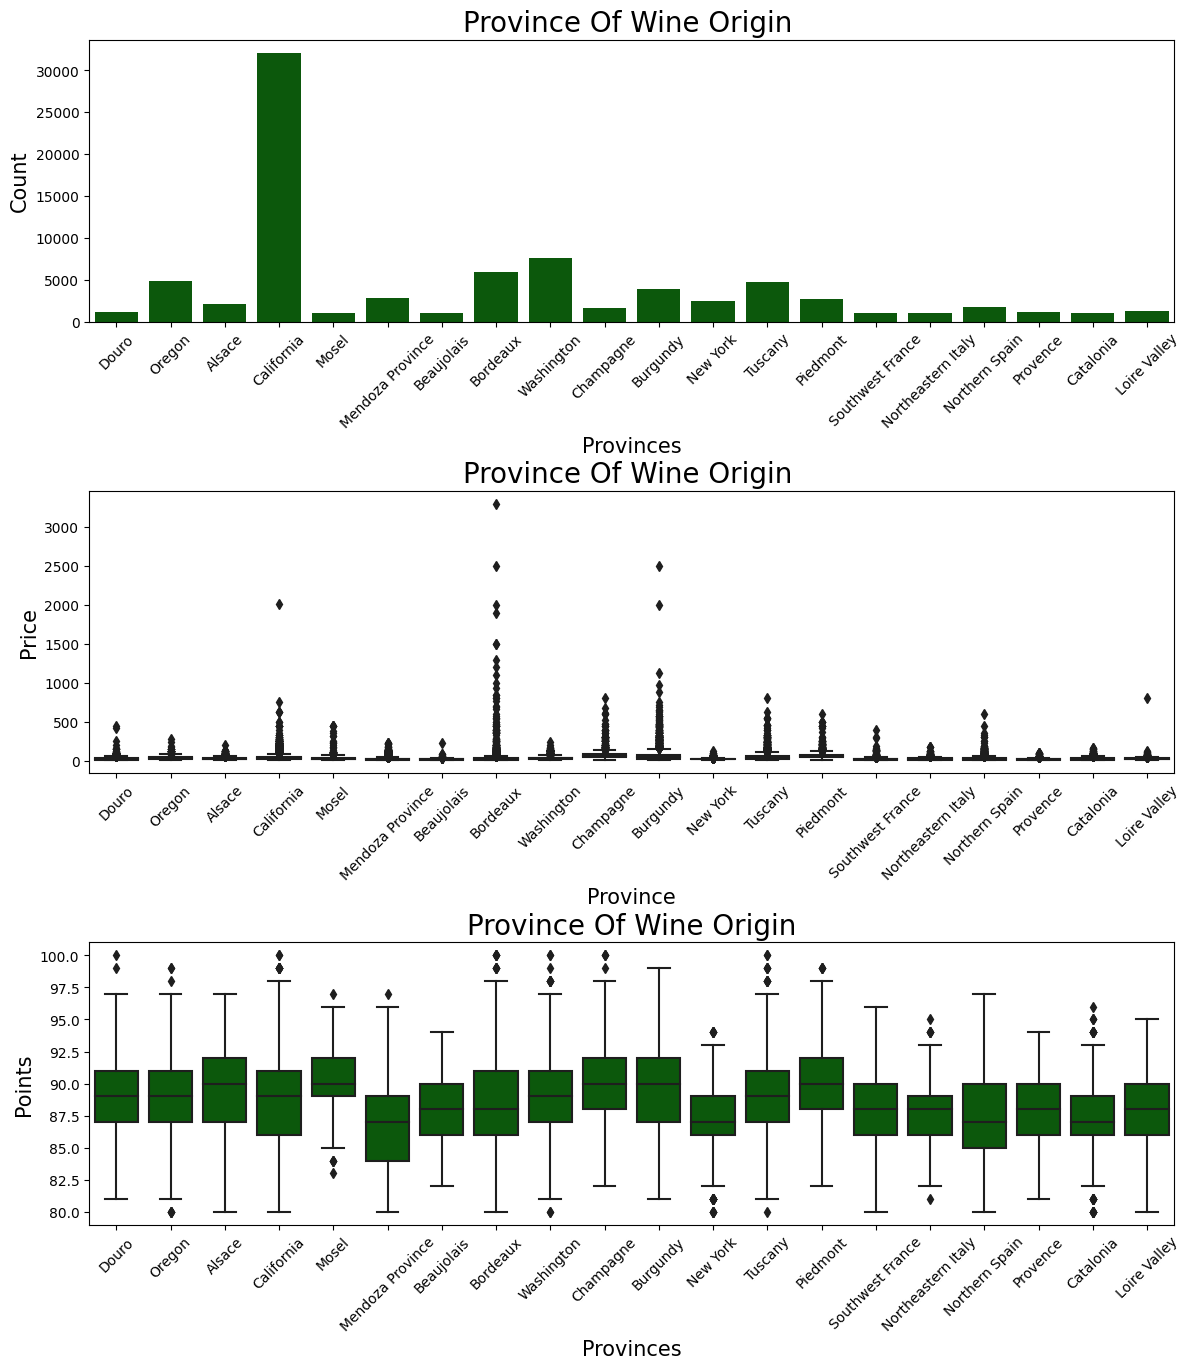

In [102]:
plt.figure(figsize=(14,15))

provinces = df['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='province', 
                  data=df.loc[(df.province.isin(provinces.index.values))], 
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=df.loc[(df.province.isin(provinces.index.values))], 
                  color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=df.loc[(df.province.isin(provinces.index.values))], 
                  color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

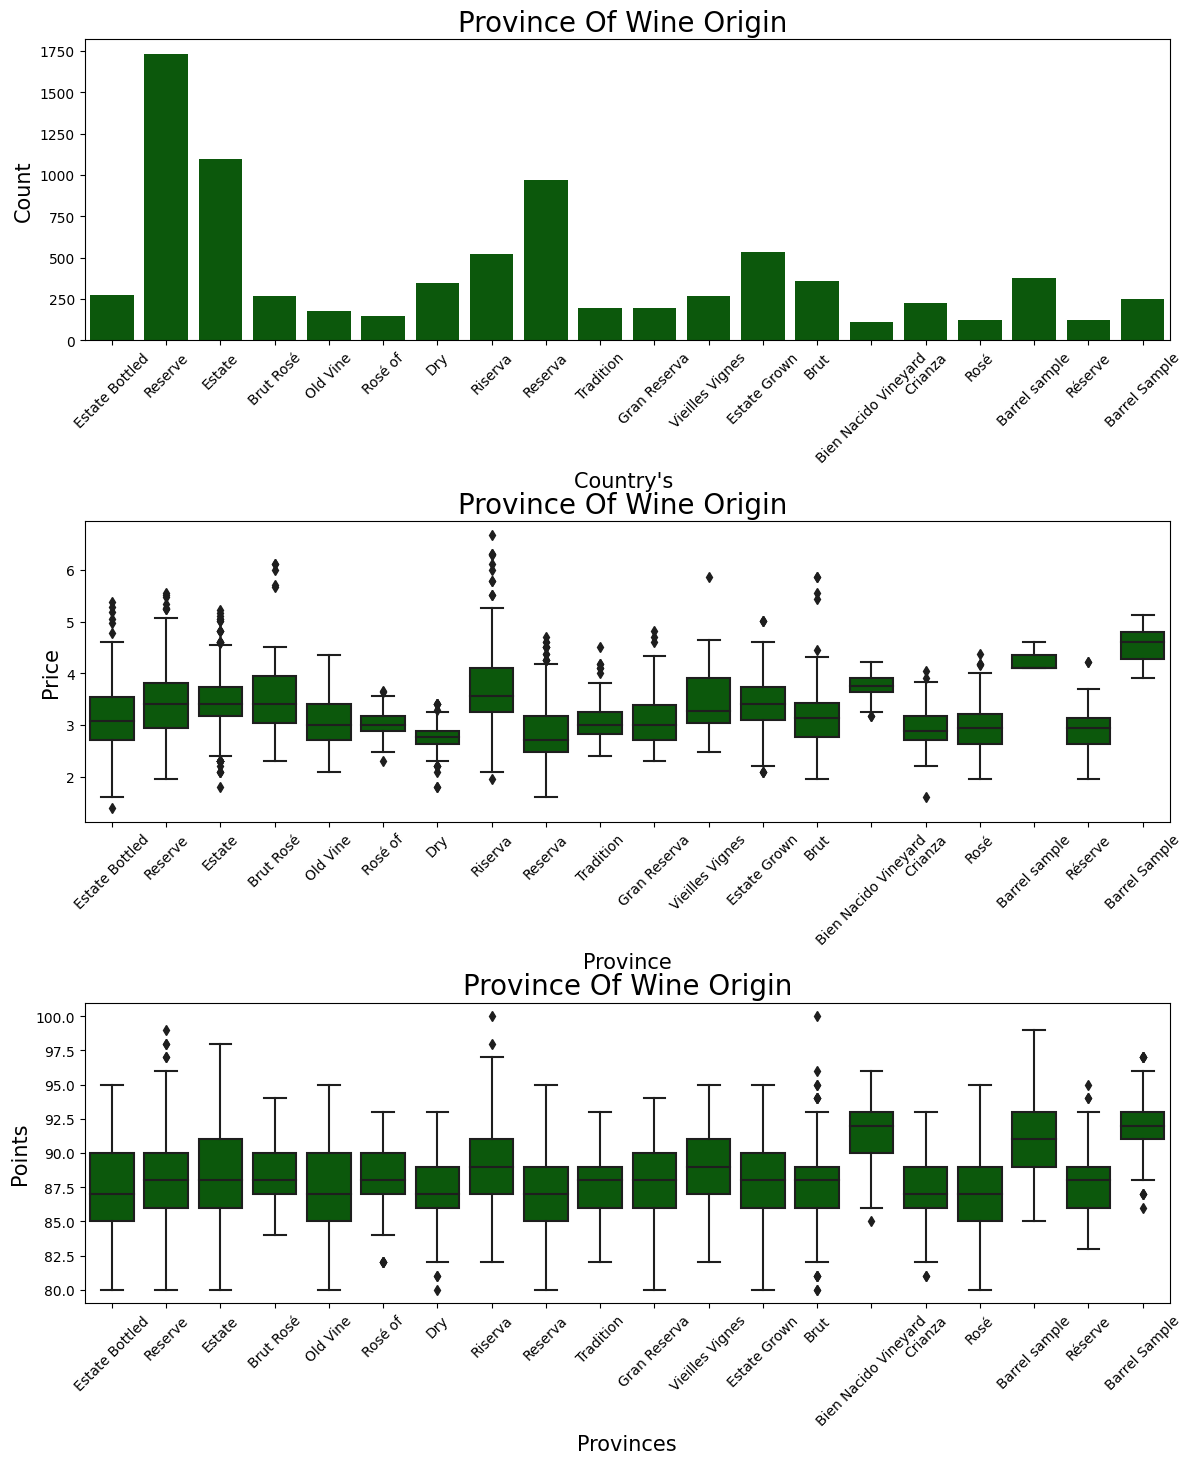

In [103]:
plt.figure(figsize=(14,16))

designation = df.designation.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='designation', 
                  data=df.loc[(df.designation.isin(designation.index.values))],
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='log_price', x='designation',
                  data=df.loc[(df.designation.isin(designation.index.values))], 
                 color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='designation',
                  data=df.loc[(df.designation.isin(designation.index.values))], 
                 color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

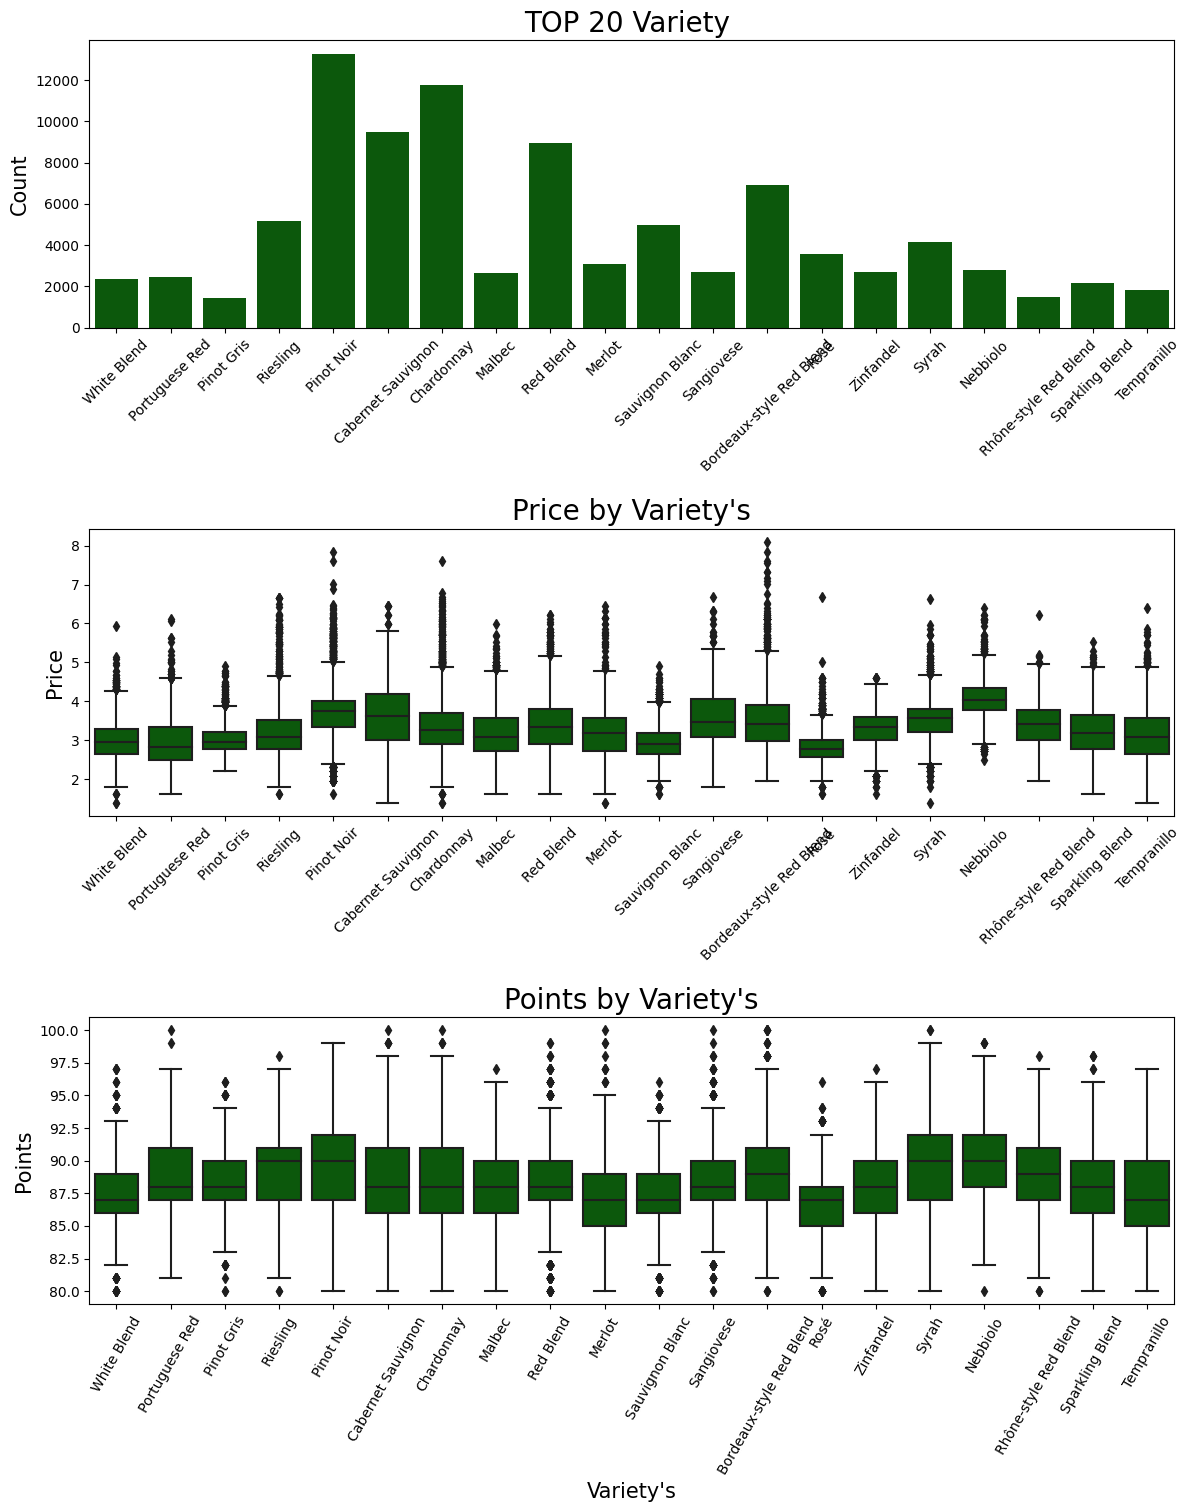

In [104]:
plt.figure(figsize=(14,16))

variety = df.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety', 
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='log_price', x='variety',
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                 color='darkgreen')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df.loc[(df.variety.isin(variety.index.values))], 
                 color='darkgreen')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=60)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()


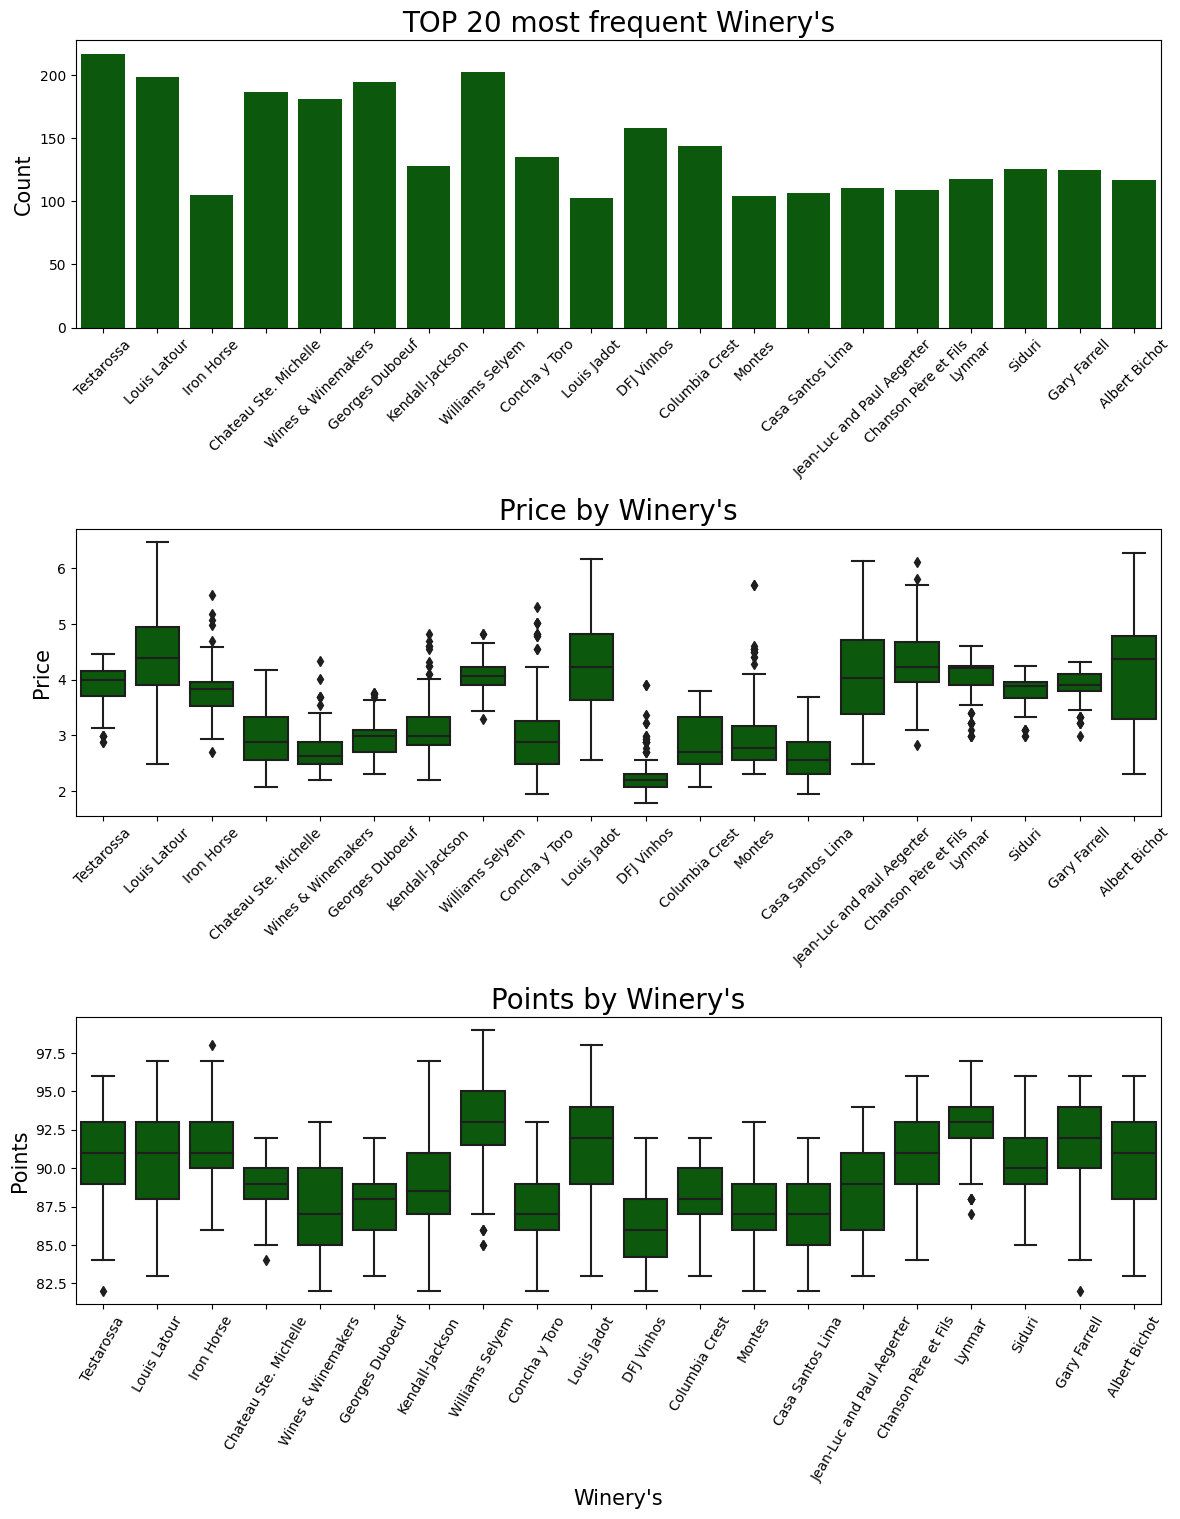

In [105]:
plt.figure(figsize=(14,16))

winery = df.winery.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='winery', 
                  data=df.loc[(df.winery.isin(winery.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='log_price', x='winery',
                  data=df.loc[(df.winery.isin(winery.index.values))],
                 color='darkgreen')
g1.set_title("Price by Winery's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='winery',
                  data=df.loc[(df.winery.isin(winery.index.values))],
                 color='darkgreen')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=60)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

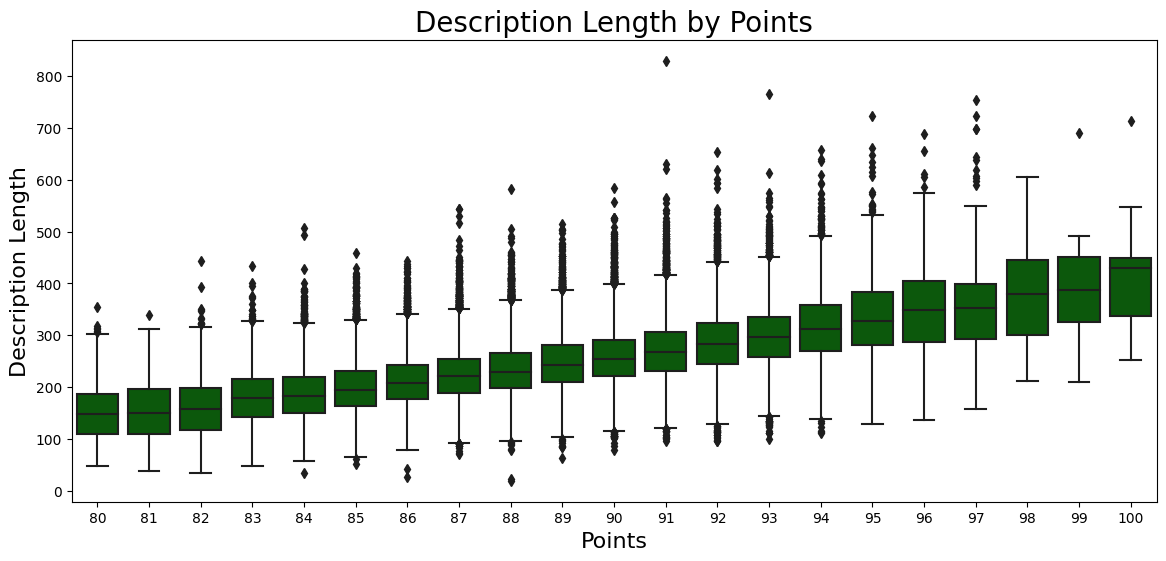

In [106]:
df = df.assign(desc_length = df['review_description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=df,
                color='darkgreen')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

<ipython-input-107-f722caaa69f1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


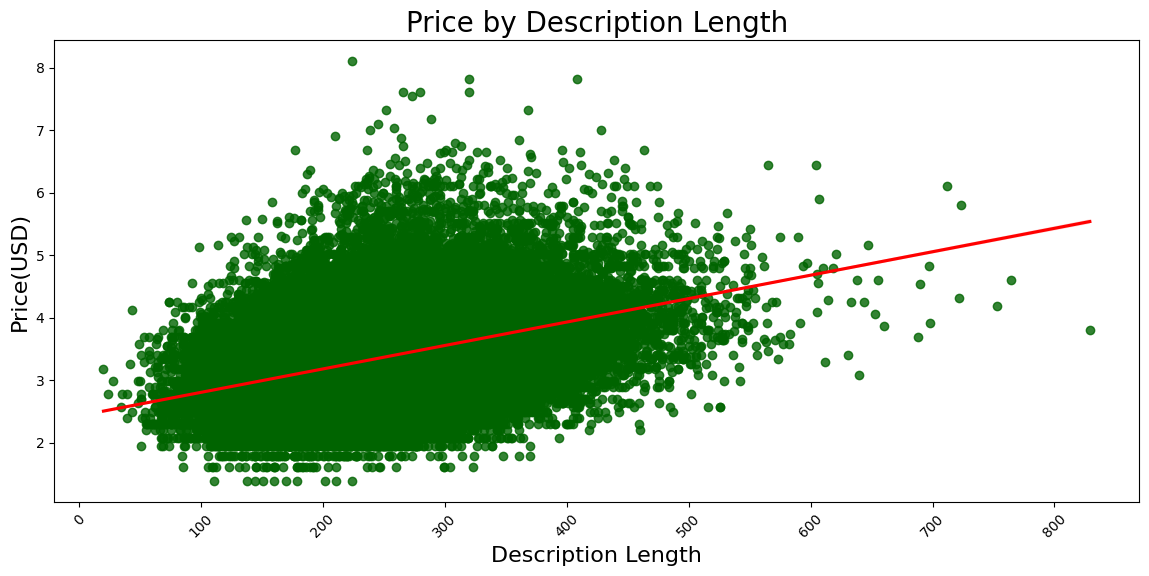

In [107]:
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='log_price', line_kws={'color':'red'},
                data=df, fit_reg=True, color='darkgreen', )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

In [108]:
!pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
sentiment = df.sample(15000).copy()
sentiment['polarity_score']=sentiment.review_description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.review_description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.review_description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.review_description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

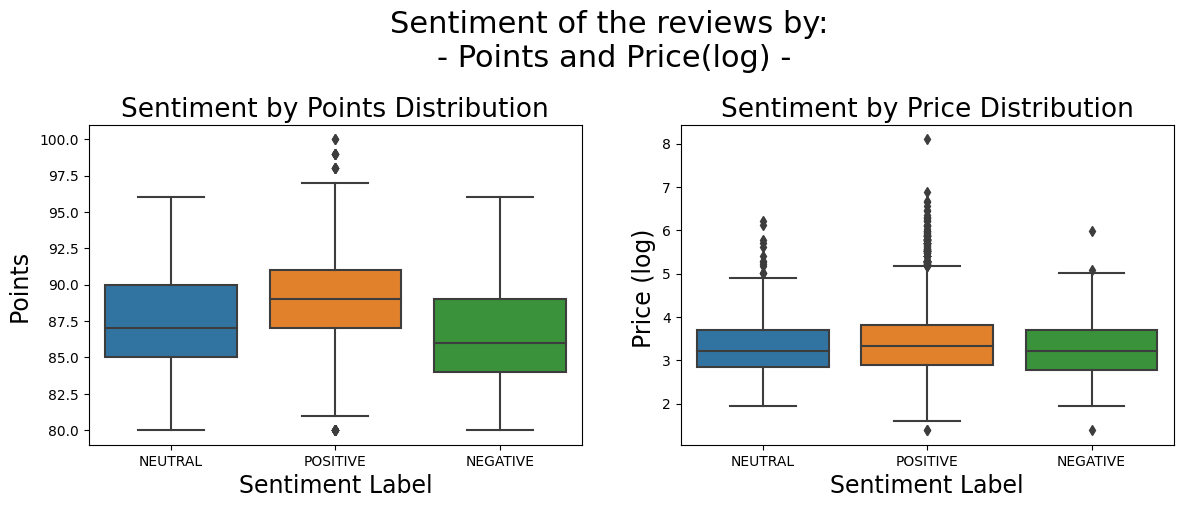

In [110]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='log_price', data=sentiment)
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()


In [111]:
drop_columns = ['region_1', 'region_2', 'designation', 'price']
df = df.drop(drop_columns, axis = 1)

In [112]:
df.head()

,country,review_title,review_description,points,province,winery,variety,rating_cat,log_price,desc_length
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,Nicosia,White Blend,2,NaN,172
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",87,Douro,Quinta dos Avidagos,Portuguese Red,2,2.708050,227
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",87,Oregon,Rainstorm,Pinot Gris,2,2.639057,186
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",87,Michigan,St. Julian,Riesling,2,2.564949,199
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",87,Oregon,Sweet Cheeks,Pinot Noir,2,4.174387,249


In [113]:
df.isnull().sum()

country                 39
review_title             0
review_description       0
points                   0
province                39
winery                   0
variety                  0
rating_cat               0
log_price             6963
desc_length              0
dtype: int64

In [114]:
df = df.dropna()

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['review_title'] = le.fit_transform(df['review_title'])
df['review_description'] = le.fit_transform(df['review_description'])
df['province'] = le.fit_transform(df['province'])
df['winery'] = le.fit_transform(df['winery'])
df['variety'] = le.fit_transform(df['variety'])

<ipython-input-115-b5ad8ec0d1b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = le.fit_transform(df['country'])


In [116]:
x = df.drop('variety', axis = 1)
y = df['variety']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25)

In [118]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, Y_train)

RandomForestClassifier()

In [119]:
predicted = model.predict(X_test)


In [120]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted, Y_test)

0.5385573688800299